<a href="https://colab.research.google.com/github/RuthvikReddyGaddam/CloudProject/blob/master/CNNcifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

print("GPU Available:", tf.config.list_physical_devices('GPU'))

# # Initialize the TPU
# try:
#     tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
#     print("TPU is available.")
# except ValueError:
#     print("TPU is not available")
#     # If TPU is not detected, raise the exception to prevent further execution
#     raise

# # Connect to the TPU
# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)

# # Use the TPU strategy
# strategy = tf.distribute.TPUStrategy(tpu)

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU is being used!")
    except RuntimeError as e:
        print(e)

GPU is being used!


In [4]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as  plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [5]:
(xt,yt), (xT,yT) = cifar10.load_data()
xt, xT = xt / 255.0, xT / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


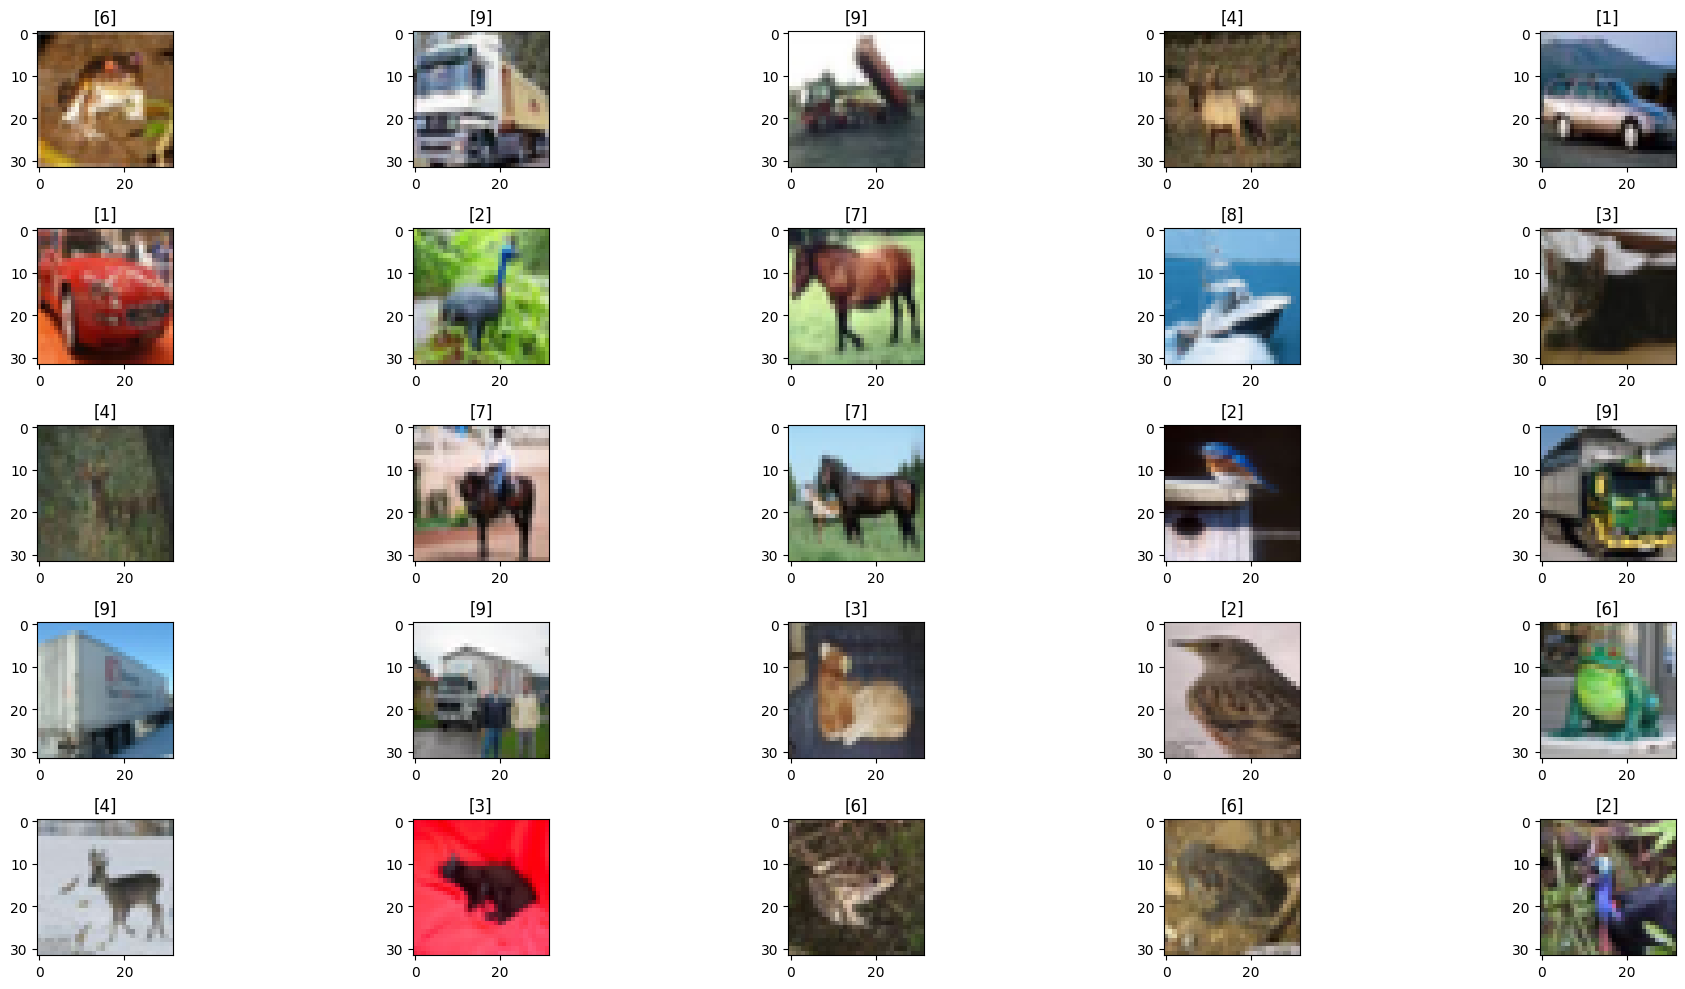

In [6]:
plt.figure(figsize=(20,10))
for idx in range(0,25):
  plt.subplot(5,5,idx+1)
  plt.imshow(xt[idx])
  plt.title(yt[idx])
plt.tight_layout()
plt.show()

In [7]:
yt = to_categorical(yt, 10)
yT = to_categorical(yT, 10)

x_train, x_val, y_train, y_val = train_test_split(xt, yt, test_size=0.2, random_state=42, stratify=yt)

print(f'Shape of x train{xt.shape}')
print(f'Shape of y train{yt.shape}')
print(f'Shape of x test{xT.shape}')
print(f'Shape of y test{yT.shape}')

Shape of x train(50000, 32, 32, 3)
Shape of y train(50000, 10)
Shape of x test(10000, 32, 32, 3)
Shape of y test(10000, 10)


In [8]:
model10 = Sequential([
    Conv2D(128, (3,3), activation="relu", padding='same', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),  # (16,16,64)
    Dropout(0.2),
    Conv2D(256, (3,3), activation="relu", padding='same'),
    BatchNormalization(),
    Conv2D(256, (3,3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),  # (8,8,128)
    Dropout(0.2),
    Conv2D(512, (3,3), activation="relu", padding='same'),
    BatchNormalization(),
    Conv2D(512, (3,3), activation="relu", padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),  # (2,2,512)
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 100 output classes
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Convert tensors back to NumPy arrays for train_test_split
x_train, x_val, y_train, y_val = train_test_split(xt, yt, test_size=0.2, random_state=42, stratify=yt)

# Convert back to TensorFlow tensors after splitting if necessary
x_train, x_val, y_train, y_val = tf.convert_to_tensor(x_train), tf.convert_to_tensor(x_val), tf.convert_to_tensor(y_train), tf.convert_to_tensor(y_val)

datagen10 = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen10.fit(x_train)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Compile and fit the model with early stopping
model10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

model10.fit(x_train, y_train,
            batch_size=64,
            epochs=30,
            validation_data=(x_val, y_val),
            callbacks=[early_stopping])


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.3667 - loss: 2.0063 - val_accuracy: 0.5365 - val_loss: 1.3465
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6583 - loss: 0.9696 - val_accuracy: 0.7176 - val_loss: 0.8151
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.7498 - loss: 0.7116 - val_accuracy: 0.7394 - val_loss: 0.7503
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8103 - loss: 0.5530 - val_accuracy: 0.7768 - val_loss: 0.6538
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8447 - loss: 0.4539 - val_accuracy: 0.8063 - val_loss: 0.5793
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8864 - loss: 0.3359 - val_accuracy: 0.7917 - val_loss: 0.6593
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9044 - loss: 0.2777 - val_accuracy: 0.8326 - val_loss: 0.5259
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9236 - loss: 0.2204 - val_accuracy: 

In [13]:
test_loss, test_acc = model10.evaluate(xT, yT)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8535 - loss: 0.7130
Test accuracy: 0.8517000079154968


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.87      0.86      1000
  automobile       0.93      0.93      0.93      1000
        bird       0.86      0.71      0.78      1000
         cat       0.76      0.71      0.73      1000
        deer       0.83      0.83      0.83      1000
         dog       0.80      0.78      0.79      1000
        frog       0.84      0.93      0.88      1000
       horse       0.87      0.90      0.88      1000
        ship       0.88      0.94      0.91      1000
       truck       0.89      0.93      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



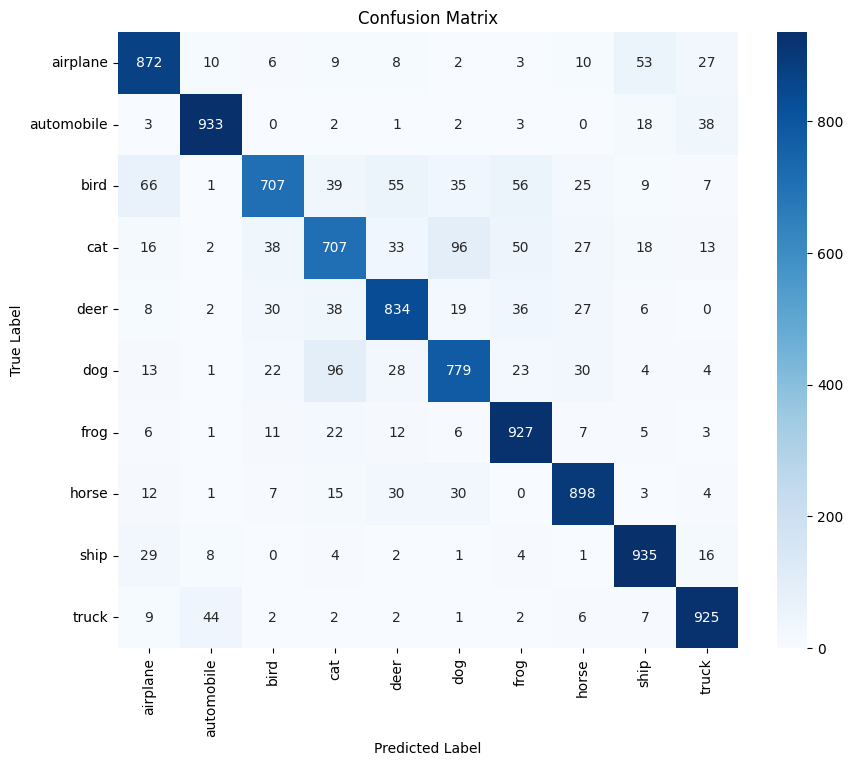

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

y_pred_probs = model10.predict(xT)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(yT, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [15]:
model10.save('cifar10CNN.h5')


In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("cnn_cifar10.h5")